In [47]:
using DelimitedFiles, FileIO
using Plots, Rsvg, LaTeXStrings
using Chemfiles, JUMD, NamedArrays
using LinearAlgebra, Statistics
pdb = "1f96"
casa_ca = string("/home/pbarletta/labo/20/bisana/run/carmn_1f96")
casa_6 = string("/home/pbarletta/labo/20/bisana/run/rmn_1f96")
rtdos = "/home/pbarletta/labo/20/bisana/rtdos_log"

"/home/pbarletta/labo/20/bisana/rtdos_log"

## Volúmenes de cavidades 1F96

In [48]:
n_rmn = 20
vol_ecf = Array{Float64, 1}(undef, n_rmn)
vol_edf = Array{Float64, 1}(undef, n_rmn)

for i in 1:n_rmn
    vol_ecf[i] = convert(Float64, readdlm(joinpath(
        casa_ca, "cavidad", string("vol_ecf_", i)))[1, 2])
    vol_edf[i] = convert(Float64, readdlm(joinpath(
        casa_ca, "cavidad", string("vol_edf_", i)))[1, 2])
end

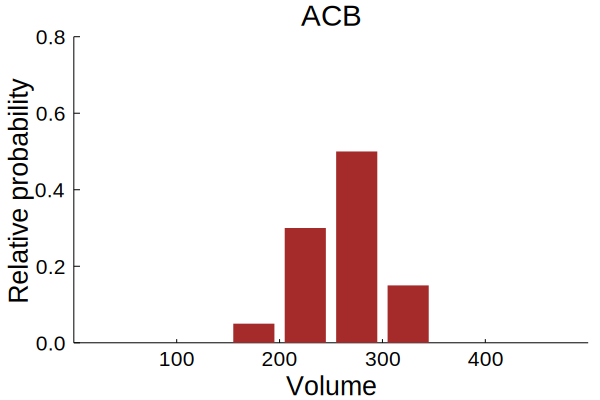

In [49]:
st = 50
min_vol = 100
max_vol = 500
bin_vol = collect(min_vol:st:max_vol)
wgh_vol = fill(1.0, length(vol_ecf))

# Histograma ponderado
Wbins_vol_acb, Whis_vol_acb = JUMD.weightedHist(vol_ecf, bin_vol, wgh_vol, true, false);

plt_his_vol = bar(Wbins_vol_acb, Whis_vol_acb,
    xlims = (0, max_vol), ylims = (0, .8),
    xticks = 100:100:max_vol-50,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(14, "Arial"),
    legendfont = font(14, "Arial"), titlefont = font(20, "Arial"),
    title = "ACB", yaxis = "Relative probability", xaxis = "Volume")

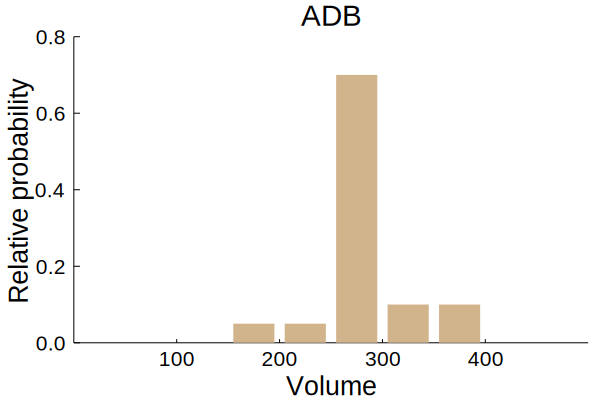

In [50]:
# Histograma ponderado
Wbins_vol_adb, Whis_vol_adb = JUMD.weightedHist(vol_edf, bin_vol, wgh_vol, true, false);

plt_his_vol = bar(Wbins_vol_adb, Whis_vol_adb,
    xlims = (0, max_vol), ylims = (0, .8),
    xticks = 100:100:max_vol-50,
    linecolor = false, fillcolor = Colors.colorant"Tan",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(14, "Arial"),
    legendfont = font(14, "Arial"), titlefont = font(20, "Arial"),
    title = "ADB", yaxis = "Relative probability", xaxis = "Volume")

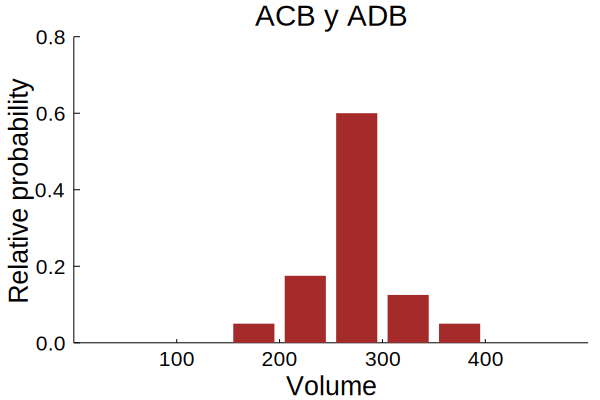

In [51]:
st = 50
min_vol = 100
max_vol = 500
bin_vol = collect(min_vol:st:max_vol)
wgh_vol = fill(1.0, length(vol_ecf) + length(vol_edf))

# Histograma ponderado
Wbins_vol_acdb, Whis_vol_acdb = JUMD.weightedHist([vol_ecf ; vol_edf], bin_vol, wgh_vol, true, false);

plt_his_vol = bar(Wbins_vol_acdb, Whis_vol_acdb,
    xlims = (0, max_vol), ylims = (0, .8),
    xticks = 100:100:max_vol-50,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(14, "Arial"),
    legendfont = font(14, "Arial"), titlefont = font(20, "Arial"),
    title = "ACB y ADB", yaxis = "Relative probability", xaxis = "Volume")

In [52]:
NamedArray([ mean(vol_ecf) std(vol_ecf) std(vol_ecf) / mean(vol_ecf) ; 
     mean(vol_edf) std(vol_edf) std(vol_edf) / mean(vol_ecf) ],
    (["ACB" ; "ADB"], ["μ" ; "std" ; "μ/std"]))

2×3 Named Array{Float64,2}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
ACB   │  263.428   38.5132    0.1462
ADB   │  282.687   43.0301  0.163347

# Flexibilidad con modos de 6 partículas

In [93]:
for coff in 6:12
    global flx_ecf = Array{Float64, 1}(undef, n_rmn)
    global flx_edf = Array{Float64, 1}(undef, n_rmn)

    for i in 1:n_rmn
        flx_ecf[i] = convert(Float64, readdlm(joinpath(
            casa_6, string(coff, "_cutoff_1f96"), "flx", string(i, "_flx_ecf_5")))[1, 2])
        flx_edf[i] = convert(Float64, readdlm(joinpath(
            casa_6, string(coff, "_cutoff_1f96"), "flx", string(i, "_flx_edf_5")))[1, 2])
    end
    
    sym_flx_ecf = Symbol("flx_ecf_", coff)
    sym_flx_edf = Symbol("flx_edf_", coff)
    eval(:($sym_flx_ecf = flx_ecf))
    eval(:($sym_flx_edf = flx_edf))
end

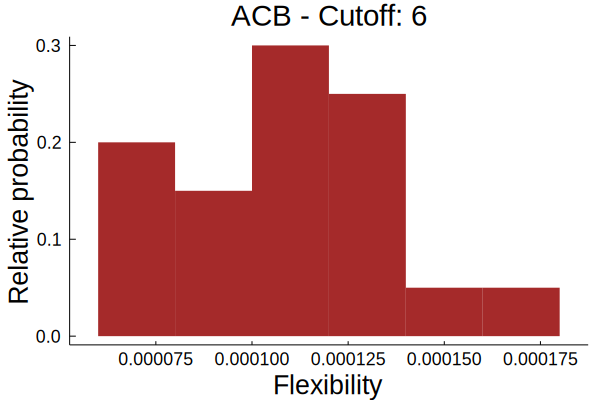

In [96]:
plt_his_flx = histogram(flx_ecf_6, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 6", yaxis = "Relative probability", xaxis = "Flexibility")

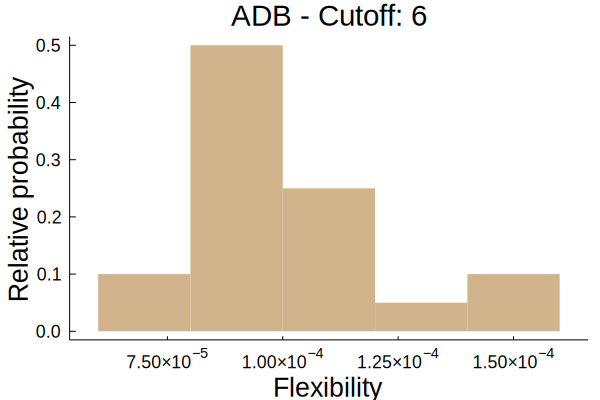

In [97]:
plt_his_flx = histogram(flx_edf_6, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 6", yaxis = "Relative probability", xaxis = "Flexibility")

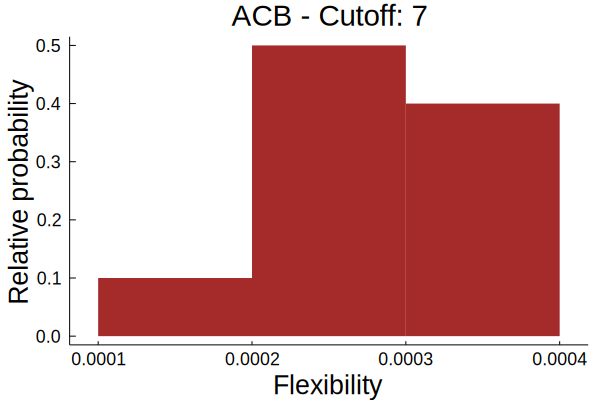

In [54]:
plt_his_flx = histogram(flx_ecf_7, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 7", yaxis = "Relative probability", xaxis = "Flexibility")

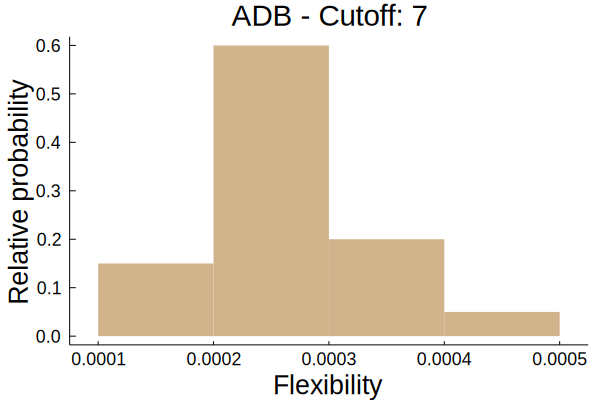

In [55]:
plt_his_flx = histogram(flx_edf_7, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 7", yaxis = "Relative probability", xaxis = "Flexibility")

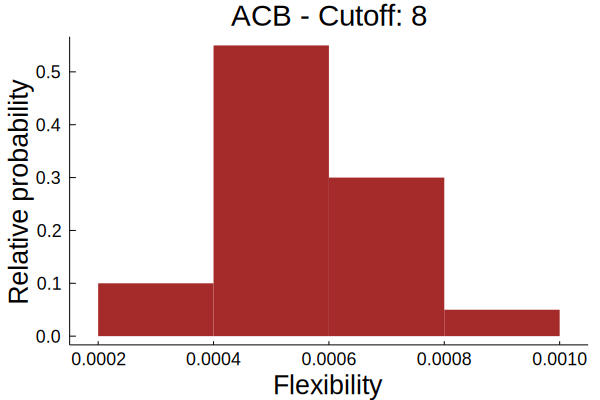

In [56]:
plt_his_flx = histogram(flx_ecf_8, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 8", yaxis = "Relative probability", xaxis = "Flexibility")

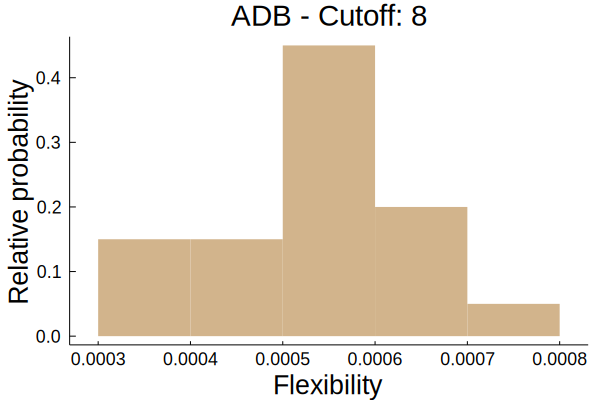

In [57]:
plt_his_flx = histogram(flx_edf_8, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 8", yaxis = "Relative probability", xaxis = "Flexibility")

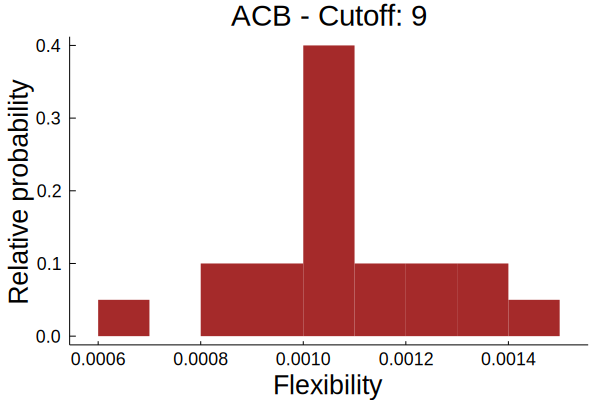

In [58]:
plt_his_flx = histogram(flx_ecf_9, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 9", yaxis = "Relative probability", xaxis = "Flexibility")

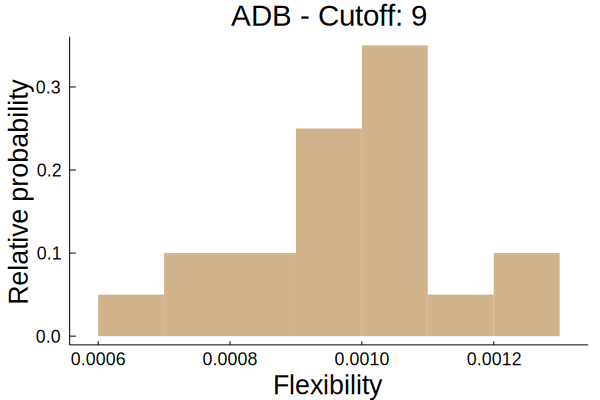

In [59]:
plt_his_flx = histogram(flx_edf_9, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 9", yaxis = "Relative probability", xaxis = "Flexibility")

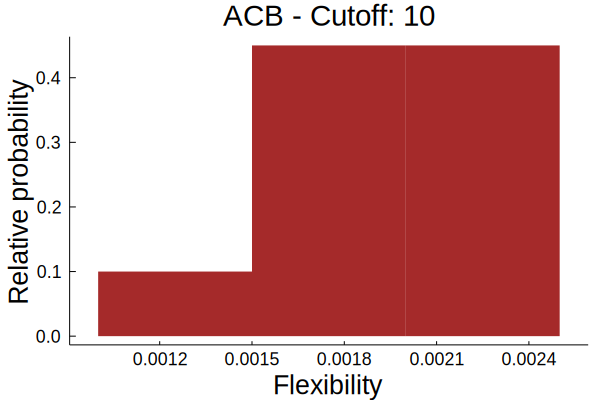

In [60]:
plt_his_flx = histogram(flx_ecf_10, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 10", yaxis = "Relative probability", xaxis = "Flexibility")

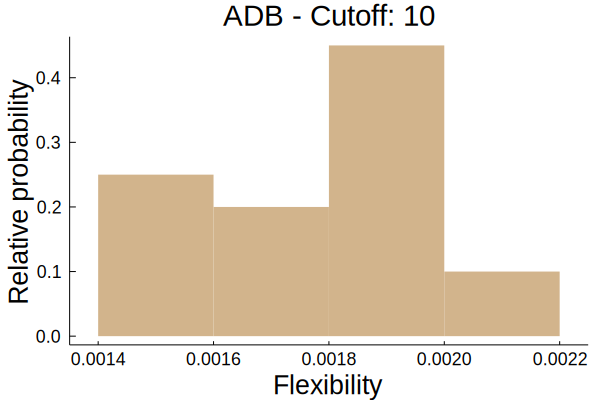

In [61]:
plt_his_flx = histogram(flx_edf_10, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 10", yaxis = "Relative probability", xaxis = "Flexibility")

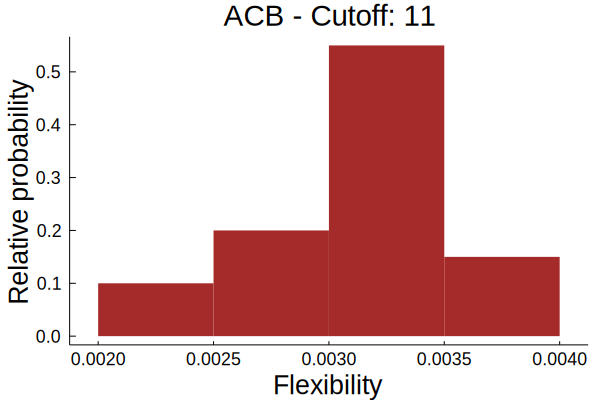

In [62]:
plt_his_flx = histogram(flx_ecf_11, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 11", yaxis = "Relative probability", xaxis = "Flexibility")

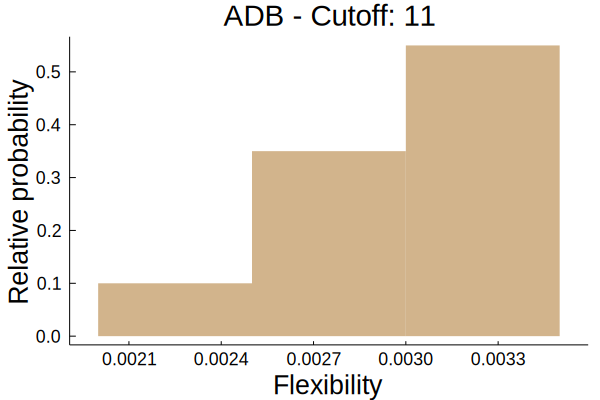

In [63]:
plt_his_flx = histogram(flx_edf_11, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 11", yaxis = "Relative probability", xaxis = "Flexibility")

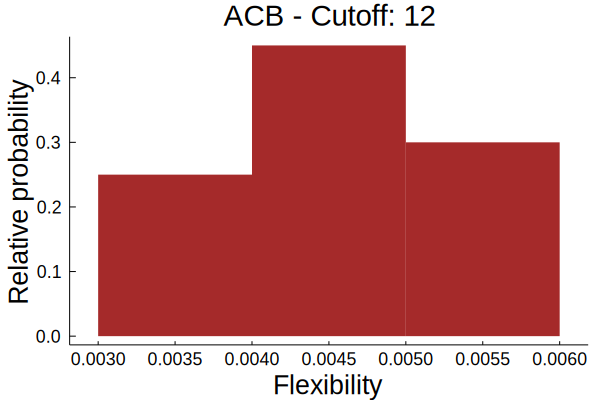

In [64]:
plt_his_flx = histogram(flx_ecf_12, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 12", yaxis = "Relative probability", xaxis = "Flexibility")

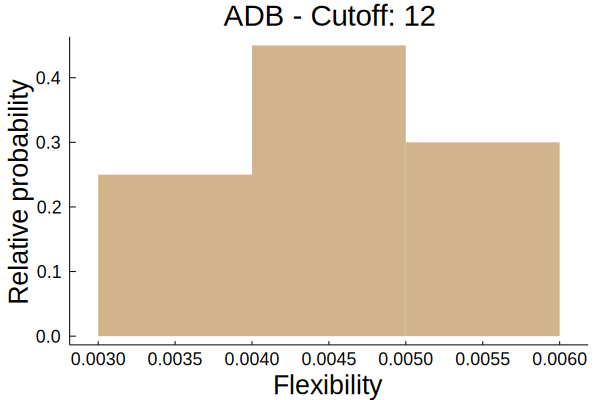

In [65]:
plt_his_flx = histogram(flx_edf_12, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 12", yaxis = "Relative probability", xaxis = "Flexibility")

# Flexibilidad con modos de Calpha

In [66]:
for coff in 7:20
    global flx_ecf_ca = Array{Float64, 1}(undef, n_rmn)
    global flx_edf_ca = Array{Float64, 1}(undef, n_rmn)

    for i in 1:n_rmn
        flx_ecf_ca[i] = convert(Float64, readdlm(joinpath(
            casa_ca, string(coff, "_cutoff_1f96"), "flx", string(i, "_flx_ecf_5")))[1, 2])
        flx_edf_ca[i] = convert(Float64, readdlm(joinpath(
            casa_ca, string(coff, "_cutoff_1f96"), "flx", string(i, "_flx_edf_5")))[1, 2])
    end
    
    sym_flx_ecf_ca = Symbol("flx_ecf_ca_", coff)
    sym_flx_edf_ca = Symbol("flx_edf_ca_", coff)
    eval(:($sym_flx_ecf_ca = flx_ecf_ca))
    eval(:($sym_flx_edf_ca = flx_edf_ca))
end

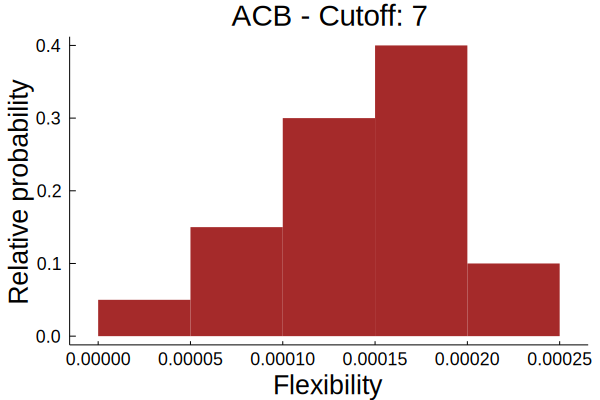

In [67]:
plt_his_flx = histogram(flx_ecf_ca_7, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 7", yaxis = "Relative probability", xaxis = "Flexibility")

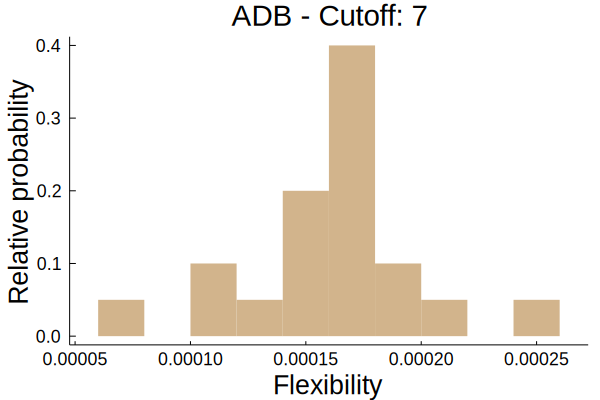

In [68]:
plt_his_flx = histogram(flx_edf_ca_7, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 7", yaxis = "Relative probability", xaxis = "Flexibility")

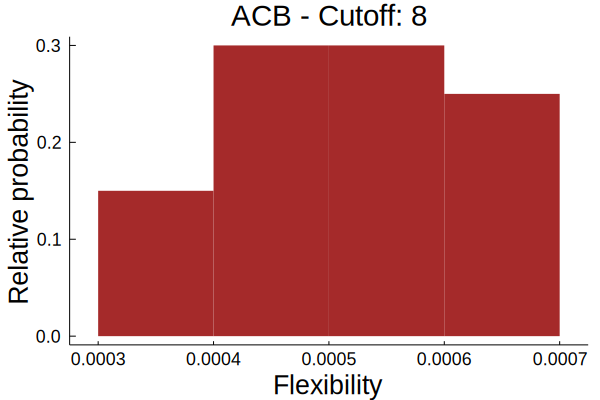

In [69]:
plt_his_flx = histogram(flx_ecf_ca_8, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 8", yaxis = "Relative probability", xaxis = "Flexibility")

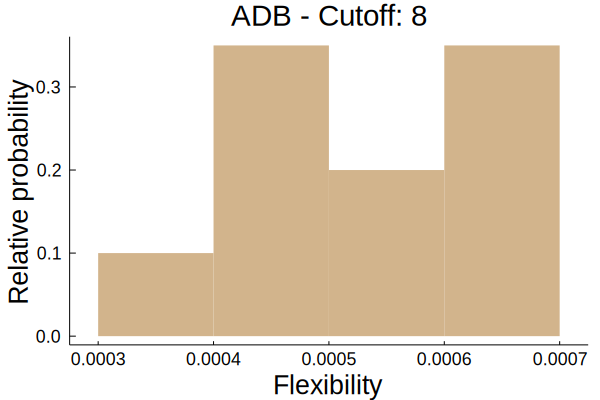

In [70]:
plt_his_flx = histogram(flx_edf_ca_8, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 8", yaxis = "Relative probability", xaxis = "Flexibility")

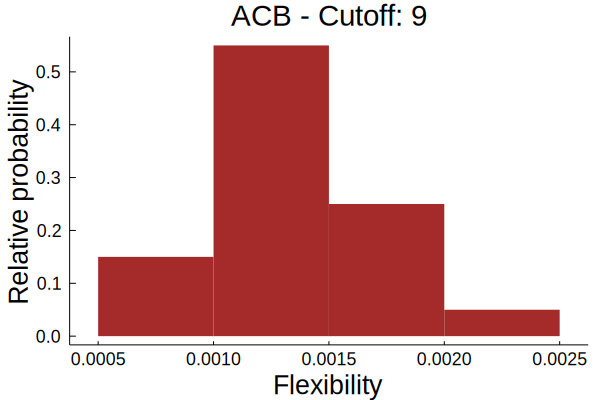

In [71]:
plt_his_flx = histogram(flx_ecf_ca_9, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 9", yaxis = "Relative probability", xaxis = "Flexibility")

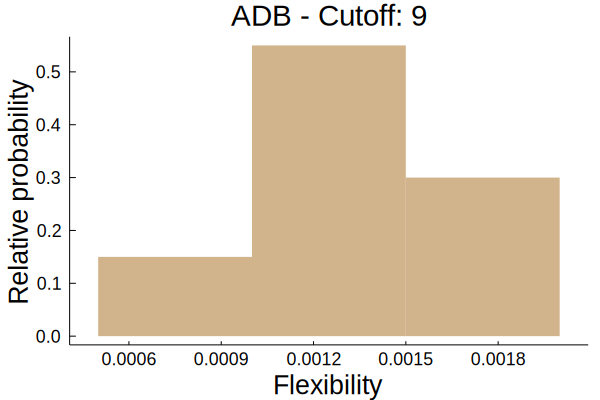

In [72]:
plt_his_flx = histogram(flx_edf_ca_9, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 9", yaxis = "Relative probability", xaxis = "Flexibility")

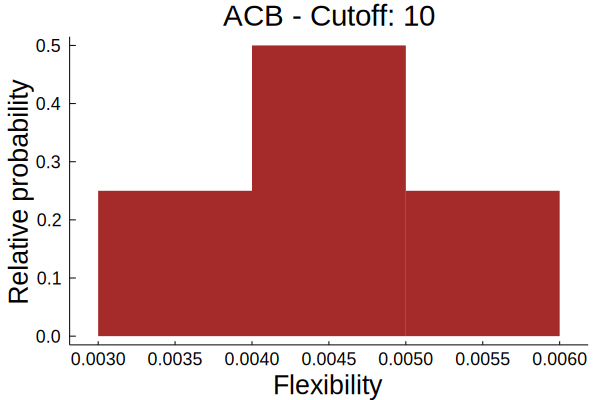

In [73]:
plt_his_flx = histogram(flx_ecf_ca_10, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 10", yaxis = "Relative probability", xaxis = "Flexibility")

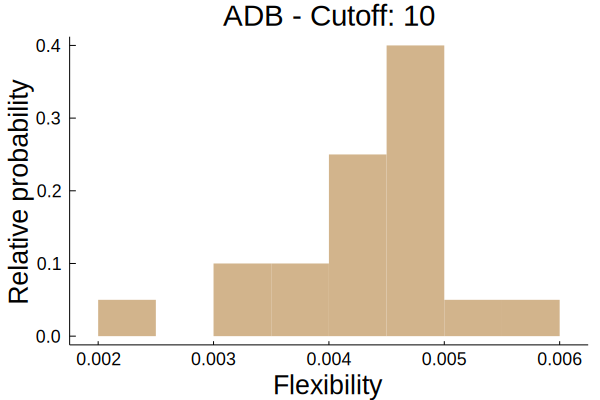

In [74]:
plt_his_flx = histogram(flx_edf_ca_10, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 10", yaxis = "Relative probability", xaxis = "Flexibility")

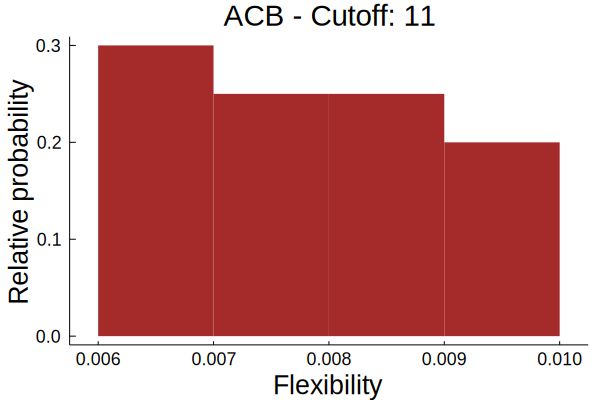

In [75]:
plt_his_flx = histogram(flx_ecf_ca_11, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 11", yaxis = "Relative probability", xaxis = "Flexibility")

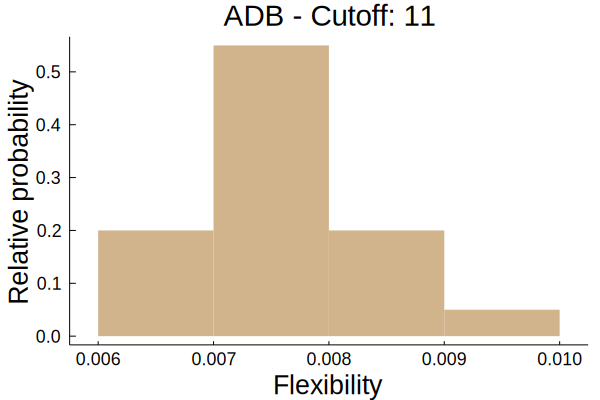

In [76]:
plt_his_flx = histogram(flx_edf_ca_11, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 11", yaxis = "Relative probability", xaxis = "Flexibility")

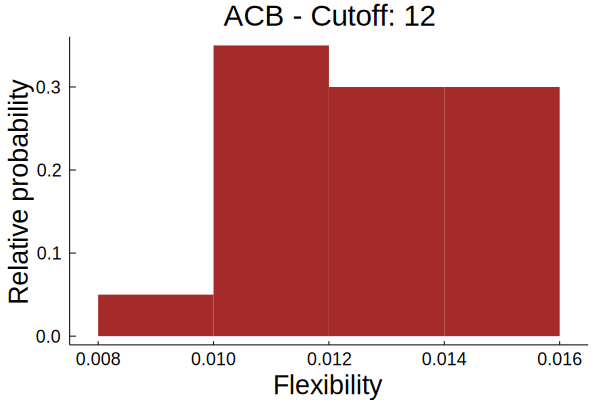

In [77]:
plt_his_flx = histogram(flx_ecf_ca_12, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 12", yaxis = "Relative probability", xaxis = "Flexibility")

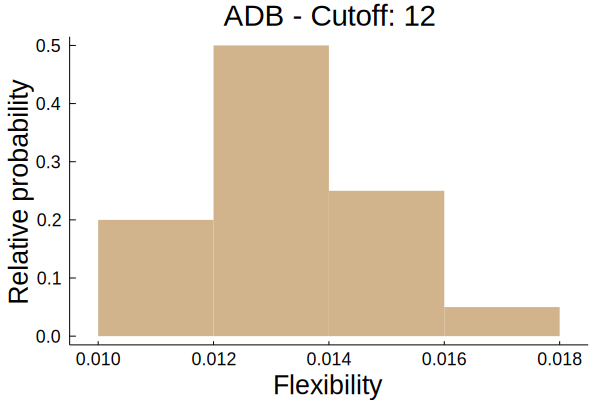

In [78]:
plt_his_flx = histogram(flx_edf_ca_12, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 12", yaxis = "Relative probability", xaxis = "Flexibility")

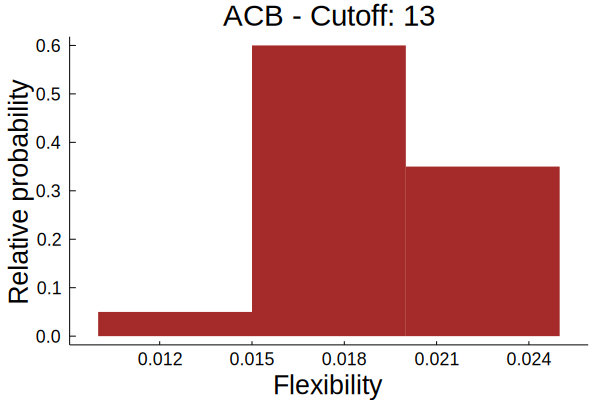

In [79]:
plt_his_flx = histogram(flx_ecf_ca_13, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 13", yaxis = "Relative probability", xaxis = "Flexibility")

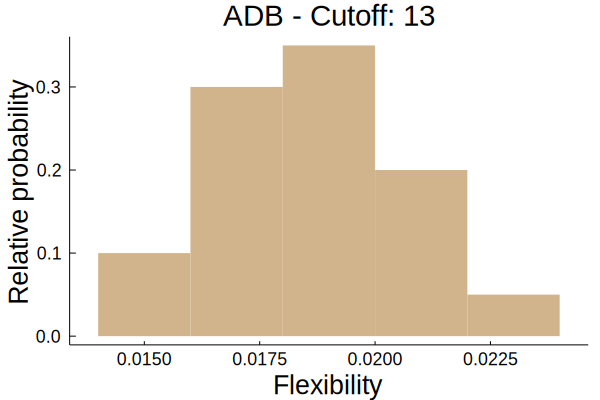

In [80]:
plt_his_flx = histogram(flx_edf_ca_13, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 13", yaxis = "Relative probability", xaxis = "Flexibility")

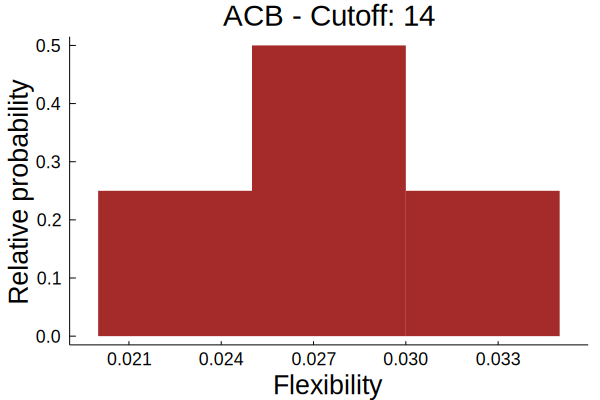

In [81]:
plt_his_flx = histogram(flx_ecf_ca_14, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 14", yaxis = "Relative probability", xaxis = "Flexibility")

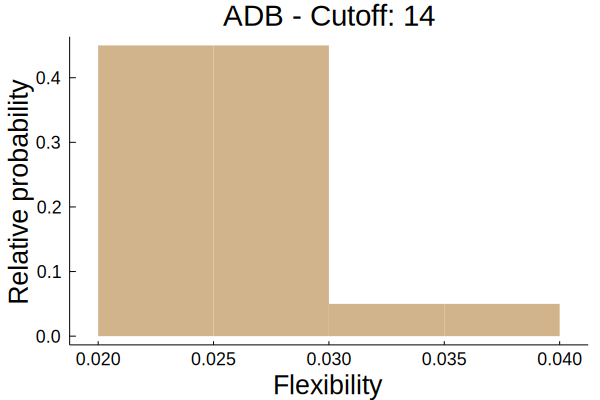

In [82]:
plt_his_flx = histogram(flx_edf_ca_14, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 14", yaxis = "Relative probability", xaxis = "Flexibility")

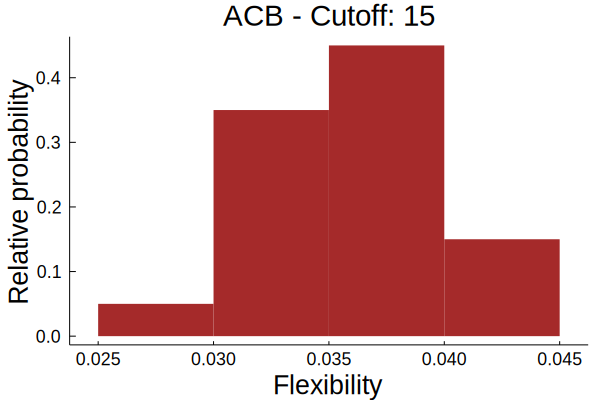

In [83]:
plt_his_flx = histogram(flx_ecf_ca_15, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 15", yaxis = "Relative probability", xaxis = "Flexibility")

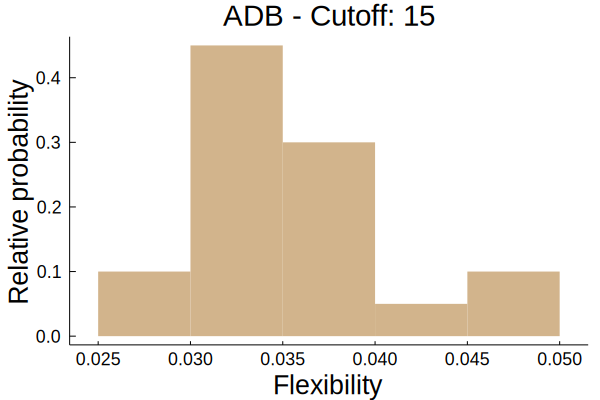

In [84]:
plt_his_flx = histogram(flx_edf_ca_15, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 15", yaxis = "Relative probability", xaxis = "Flexibility")

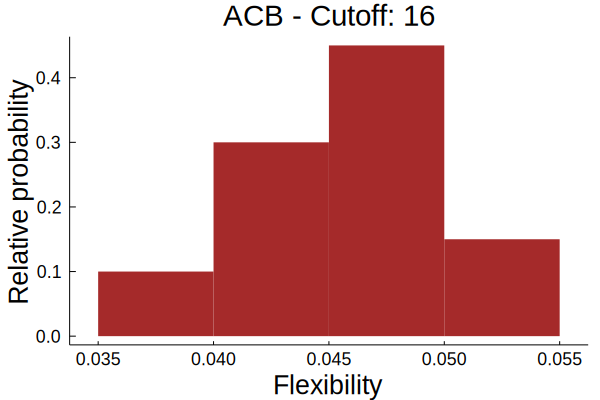

In [85]:
plt_his_flx = histogram(flx_ecf_ca_16, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 16", yaxis = "Relative probability", xaxis = "Flexibility")

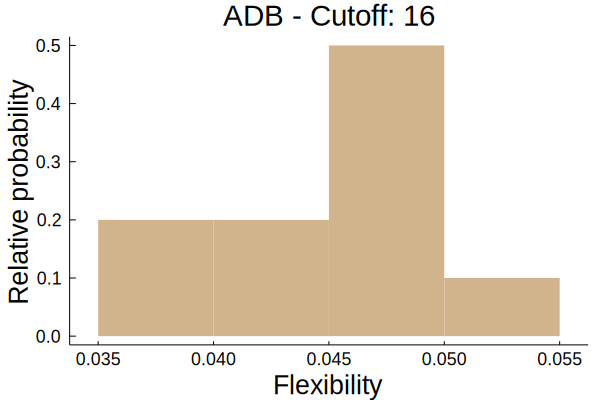

In [86]:
plt_his_flx = histogram(flx_edf_ca_16, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 16", yaxis = "Relative probability", xaxis = "Flexibility")

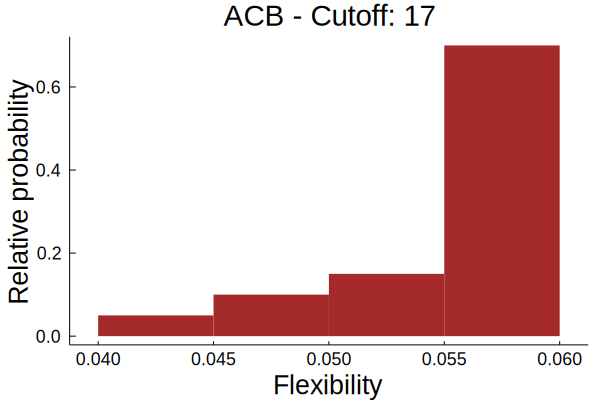

In [87]:
plt_his_flx = histogram(flx_ecf_ca_17, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 17", yaxis = "Relative probability", xaxis = "Flexibility")

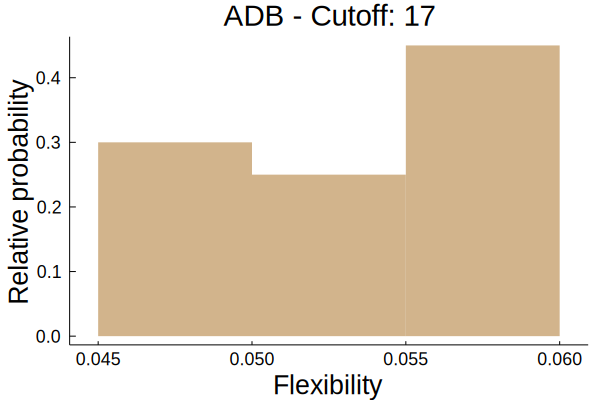

In [88]:
plt_his_flx = histogram(flx_edf_ca_17, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 17", yaxis = "Relative probability", xaxis = "Flexibility")

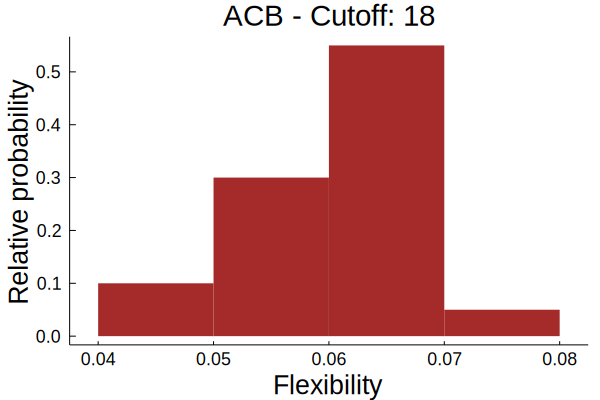

In [89]:
plt_his_flx = histogram(flx_ecf_ca_18, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 18", yaxis = "Relative probability", xaxis = "Flexibility")

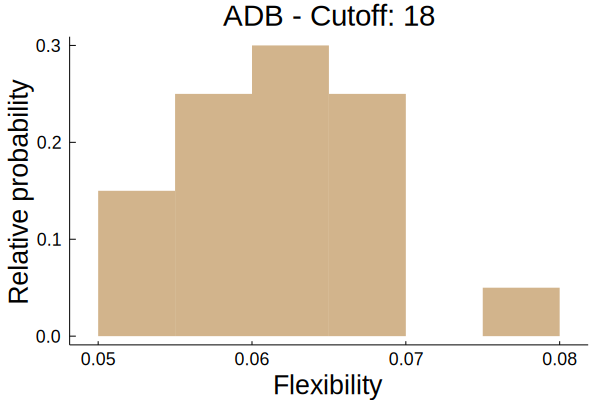

In [90]:
plt_his_flx = histogram(flx_edf_ca_18, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 18", yaxis = "Relative probability", xaxis = "Flexibility")

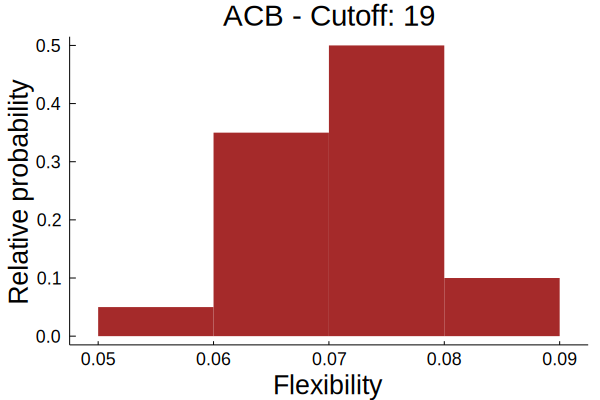

In [91]:
plt_his_flx = histogram(flx_ecf_ca_19, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ACB - Cutoff: 19", yaxis = "Relative probability", xaxis = "Flexibility")

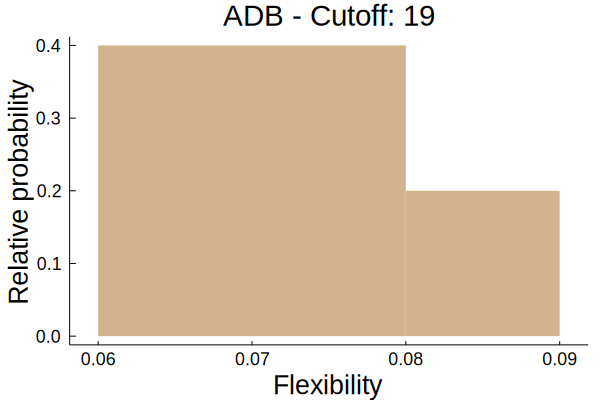

In [92]:
plt_his_flx = histogram(flx_edf_ca_19, norm = :probability,
        linecolor = false, fillcolor = Colors.colorant"Tan",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"), titlefont = font(20, "Arial"),
        title = "ADB - Cutoff: 19", yaxis = "Relative probability", xaxis = "Flexibility")